## **Outlier Analysis**

The significance of handling outliers in machine learning cannot be overstated. Outliers, or data points that deviate significantly from the majority of the data, can have a high impact on the performance and accuracy of models.

- **Box plot:** Box plots are a versatile data visualization tool that provide a concise summary of a dataset's distribution. They are particularly useful for comparing multiple datasets or identifying outliers
- **Scatter plot:** Scatter plots to visualize the relationship between the target variable and each feature. Look for clusters of outliers or unusual patterns.

Features to analyze (important features): 

- Protocol *
- Timestamp
- Flow Duration *
- Total Fwd Packet 
- Total Bwd packets
- Total Length of Fwd Packet 
- Total Length of Bwd Packet 
- Flow Bytes/s 
- Flow Packets/s
- Flow IAT Mean
- Fwd IAT Total *
- Bwd IAT Total *
- Fwd Header Length *
- Bwd Header length *
- Packet length mean
- Packet length variance *
- FIN, SYN, RST, PSH, ACK, URG, CWR, ECE flag counts 

In [1]:
# Importing important libraries 
import pandas as pd 
import numpy as np
import os 
import json

import matplotlib.pyplot as plt
import seaborn as sns

**Functions**

In [23]:
# Functions

def read_data(data_path: str, columns_to_read: list) -> pd.DataFrame:
    """
    This function reads the data from the data path
    """
    data = pd.read_csv(data_path, usecols=columns_to_read)
    return data


def save_plot(folder_name: str, file_name: str):
    """
    This function saves the plot
    """
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    try:    
        plt.savefig(os.path.join(folder_name, file_name))
        print("Fig saved successfully!")
    except:
        print("Error in saving the figure")


def scatter_plot(data: pd.DataFrame, x: str, fig_size: tuple, y: str ='Label', hue: str ='Label', save: bool=True):
    """
    This function creates a scatter plot
    """
    plt.figure(figsize=fig_size)
    sns.scatterplot(data=data, x=x, y=y, hue=hue)

    # Save plot
    if save:
        folder_name = 'outlier_plots'
        file_name = f'{x.strip()}_scatter_plot.png'   
        save_plot(folder_name, file_name)

    plt.show()


def box_plot(data: pd.DataFrame, x: str, whis: float=1.5, palette: str='viridis', if_grid: bool = True, save: bool=True):

    # Create the box plot using Seaborn
    sns.boxplot(data[x], palette=palette, showmeans=True, whis=whis)
    plt.title('Box Plot of Random Data')
    plt.ylabel('Values')
    plt.grid(if_grid)

    # Save plot
    if save:
        folder_name = 'outlier_plots'
        file_name = f'{x.strip()}_box_plot.png'   
        save_plot(folder_name, file_name)

    plt.show()


# more ...

**Data**

In [3]:
# Read data from filepath 
# This file path is for temporary usage (For EDA)
# It will be removed once the task is completed 

file_path = "dataset.csv"
# Columns in this category
columns_to_read = ['Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
                'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Fwd IAT Total', 'Bwd IAT Total', 'Fwd Header Length', 'Bwd Header Length', 'Packet Length Mean',
                'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
                'CWR Flag Count', 'ECE Flag Count', 'Label']

# Read the data
try:
    data = read_data(file_path, columns_to_read)
    print(f"Successfully read {len(data.columns)} features")
except:
    print("File not found!")
    print("[INFO] Please place the dataset.csv in the directory for use!")

Successfully read 25 features


In [4]:
# code to remove categorical columns from data
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"There are {len(categorical_columns)} categorical features!")
print("Removing these features")
data = data.drop(categorical_columns, axis=1)

There are 1 categorical features!
Removing these features


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231475 entries, 0 to 3231474
Data columns (total 24 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Protocol                    int64  
 1   Flow Duration               int64  
 2   Total Fwd Packet            int64  
 3   Total Bwd packets           int64  
 4   Total Length of Fwd Packet  float64
 5   Total Length of Bwd Packet  float64
 6   Flow Bytes/s                float64
 7   Flow Packets/s              float64
 8   Flow IAT Mean               float64
 9   Fwd IAT Total               float64
 10  Bwd IAT Total               float64
 11  Fwd Header Length           int64  
 12  Bwd Header Length           int64  
 13  Packet Length Mean          float64
 14  Packet Length Variance      float64
 15  FIN Flag Count              int64  
 16  SYN Flag Count              int64  
 17  RST Flag Count              int64  
 18  PSH Flag Count              int64  
 19  ACK Flag Count       

In [6]:
data.iloc[:, 12:].describe()

,Bwd Header Length,Packet Length Mean,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Label
count,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3.231475e+06,3231475.0,3231475.0,3231475.0,3.231475e+06
mean,3.392609e+03,2.164166e+02,1.596198e+06,1.674717e+00,1.998901e+00,2.425827e-02,1.548640e+02,2.331495e+02,0.0,0.0,0.0,1.643862e-01
std,1.876878e+04,6.260783e+02,2.262454e+07,7.360630e-01,8.149936e-01,2.063659e-01,8.766922e+02,1.262182e+03,0.0,0.0,0.0,7.431021e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00
25%,1.680000e+02,7.900000e+01,2.931210e+04,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,9.000000e+00,0.0,0.0,0.0,0.000000e+00
50%,1.680000e+02,8.209091e+01,3.404340e+04,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+01,0.0,0.0,0.0,0.000000e+00
75%,2.000000e+02,1.260000e+02,4.901569e+04,2.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,1.200000e+01,0.0,0.0,0.0,0.000000e+00
max,5.749200e+05,1.814490e+04,7.573413e+08,1.300000e+01,1.600000e+01,3.000000e+01,1.161200e+04,3.258600e+04,0.0,0.0,0.0,1.100000e+01


In [7]:
# Drop empty features 
data = data.drop(columns=['URG Flag Count', 'CWR Flag Count', 'ECE Flag Count'])
len(data.columns)

21

**Handling Null and inf values**

In [8]:
# Flow Bytes/s
# FLow Packets/s have null/inf values

data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [9]:
# check null
print(f"Data has {data.isna().sum().sum()} null values")

Data has 0 null values


In [10]:
data.iloc[:, :20].describe()

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Fwd IAT Total,Bwd IAT Total,Fwd Header Length,Bwd Header Length,Packet Length Mean,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count
count,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06,3.189766e+06
mean,6.202727e+00,7.045424e+06,1.304573e+02,1.071703e+02,6.508697e+04,1.873530e+05,1.555212e+06,4.273891e+03,2.735251e+05,7.036466e+06,6.147398e+06,4.178346e+03,3.436969e+03,2.192166e+02,1.617069e+06,1.696614e+00,2.012256e+00,2.453252e-02,1.568890e+02,2.361980e+02
std,1.561023e+00,2.469003e+07,6.865599e+02,5.900425e+02,6.271188e+05,1.277361e+06,1.942899e+07,1.105574e+04,1.508600e+06,2.467612e+07,2.401989e+07,2.196724e+04,1.888705e+04,6.296696e+02,2.277123e+07,7.153492e-01,8.116604e-01,2.075936e-01,8.822253e+02,1.270124e+03
min,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.676950e-02,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,8.345000e+03,5.000000e+00,5.000000e+00,4.740000e+02,3.570000e+02,1.311718e+04,9.711210e+01,7.968889e+02,8.271000e+03,2.923000e+03,1.680000e+02,1.680000e+02,7.900000e+01,3.192136e+04,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,9.000000e+00
50%,6.000000e+00,3.866200e+04,6.000000e+00,5.000000e+00,5.200000e+02,3.570000e+02,2.952746e+04,2.969201e+02,3.698667e+03,3.853300e+04,2.794300e+04,2.000000e+02,1.680000e+02,8.263636e+01,3.431602e+04,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+01
75%,6.000000e+00,1.345638e+05,7.000000e+00,6.000000e+00,1.042000e+03,3.570000e+02,1.339286e+05,1.485800e+03,1.121073e+04,1.335310e+05,8.196400e+04,2.320000e+02,2.000000e+02,1.274000e+02,4.983184e+04,2.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,1.200000e+01
max,1.700000e+01,1.200000e+08,1.462100e+04,1.796600e+04,1.892794e+07,4.819421e+07,1.489628e+09,5.000000e+05,1.192641e+08,1.200000e+08,1.200000e+08,4.857720e+05,5.749200e+05,1.814490e+04,7.573413e+08,1.300000e+01,1.600000e+01,3.000000e+01,1.161200e+04,3.258600e+04


So, finally we have 20 features with 1 label feature!

In [11]:
data.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Fwd IAT Total',
       'Bwd IAT Total', 'Fwd Header Length', 'Bwd Header Length',
       'Packet Length Mean', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'Label'],
      dtype='object')

---

### **Outlier Analysis**

To analyze the impact of outliers on the target feature and their dependency!

- **Scatter Plots**
- **Box plots**
- **Heatmaps**
- **Statistical tests**

Chi-Square test for feature 'Protocol'

In [12]:
import scipy.stats as stats

# Group the data by 'protocol' and calculate the frequency of each 'label'
grouped_data = data.groupby('Protocol')['Label'].value_counts().unstack()

# Calculate the chi-square test of independence
chi2_stat, p_value, _, _ = stats.chi2_contingency(grouped_data)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The two variables are significantly correlated.")
else:
    print("There is no significant correlation between the two variables.")

Chi-square statistic: 175422.14133124557
P-value: 0.0
The two variables are significantly correlated.


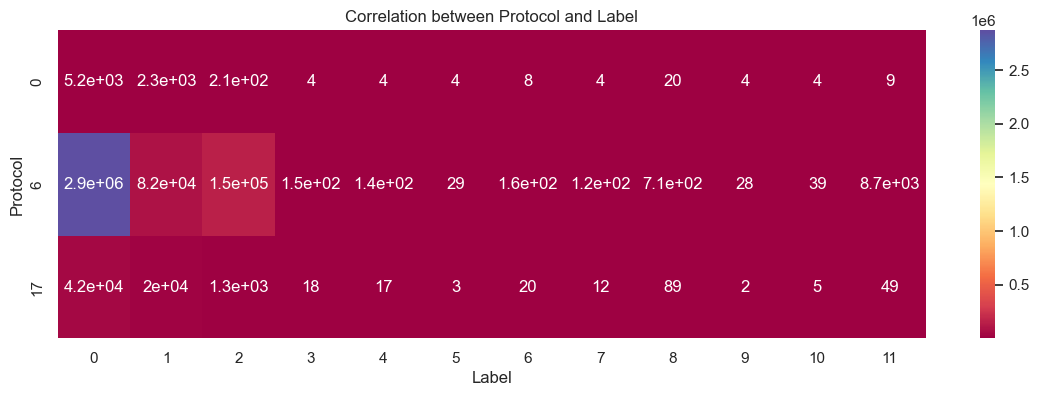

In [42]:
# lets check it by plot
# Create a heatmap using seaborn
import os 
if not os.path.exists('outlier_plots'):
    os.makedirs('outlier_plots', exist_ok=True)

sns.set(rc={'figure.figsize': (14, 4)})
sns.heatmap(grouped_data, annot=True, cmap="Spectral")

# Set the title and labels
plt.title("Correlation between Protocol and Label")
plt.xlabel("Label")
plt.ylabel("Protocol")
plt.savefig('outlier_plots/corr_protocol.png')
# Show the plot
plt.show()

> Protocol 6: This protocol is likely used for a wide range of network activities, as it has high associations with multiple labels.

> Label 11: This label might represent a common or essential network function that is used across different protocols.

> Label 6, 7 and 8 shows significance values in protocol 6 and 17

> **No need to remove outliers**

C:\Users\91790\AppData\Local\Temp\ipykernel_6888\2608207439.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(folder_name, file_name))


Fig saved successfully!


c:\Users\91790\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


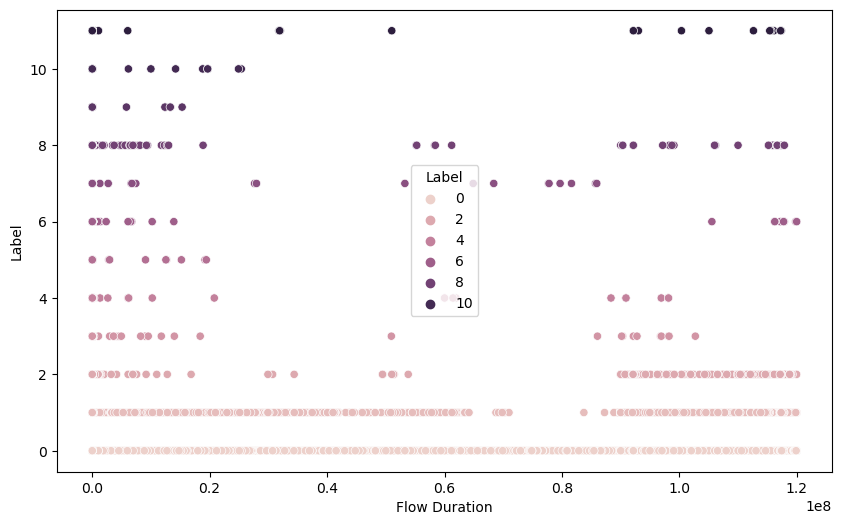

In [18]:
# Flow Duration
scatter_plot(data, x='Flow Duration', y='Label', hue='Label', fig_size=(10, 6), save=True)

> The plot shows significant relation between high and low values of Flow duration with the the extreme target labels

> **No need to remove outliers**

Fig saved successfully!


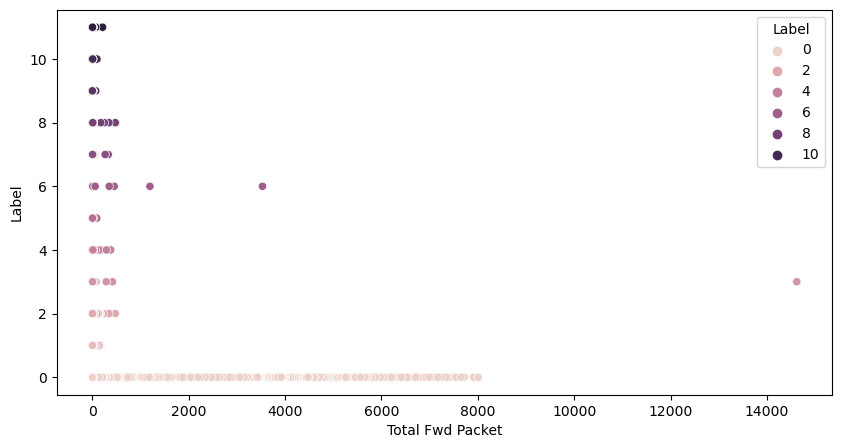

In [20]:
# Feature: Total Fwd Packet
scatter_plot(data, x='Total Fwd Packet', y='Label', hue='Label', fig_size=(10, 5), save=True)

> Possible existence of outliers as maximum values are close to 0 

> The plot shows no dependence of outlier values on any label class 

> **Outliers should be treated**

Fig saved successfully!


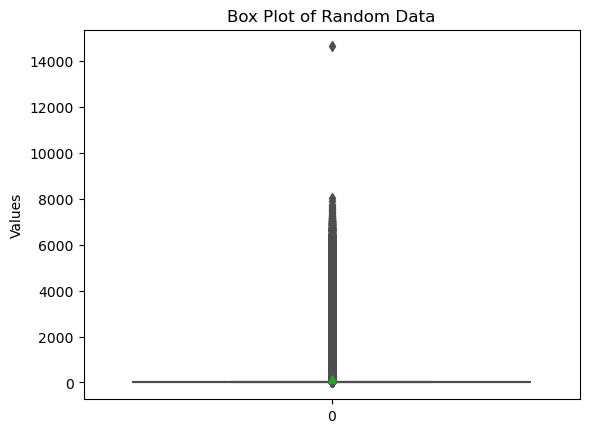

In [27]:
# box plot
box_plot(data, x='Total Fwd Packet', whis=1.5, palette='YlGnBu', if_grid=False, save=True)

Fig saved successfully!


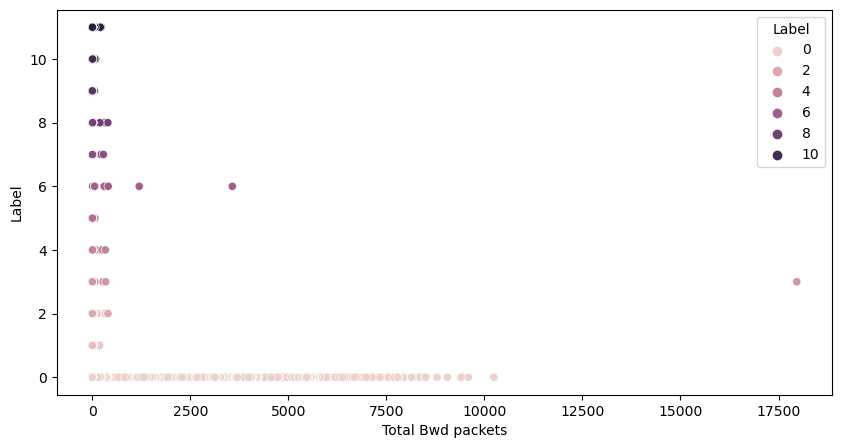

In [22]:
# Feature: Total Bwd packets 
scatter_plot(data, x='Total Bwd packets', y='Label', hue='Label', fig_size=(10, 5), save=True)

> The plot shows no dependence of outlier values on any label class 

> **Outliers should be treated**

Fig saved successfully!


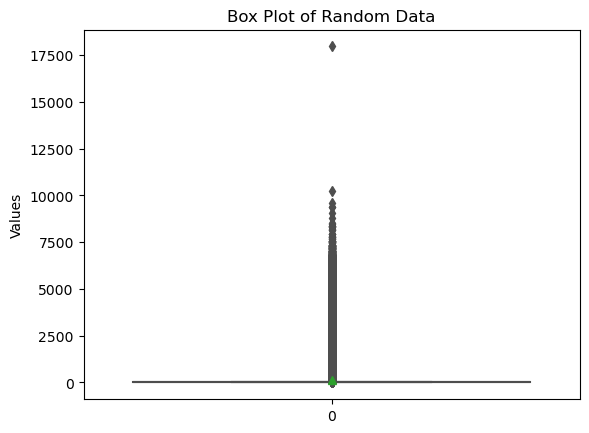

In [28]:
# box plot
box_plot(data, x='Total Bwd packets', whis=1.5, palette='YlGnBu', if_grid=False, save=True)

Fig saved successfully!


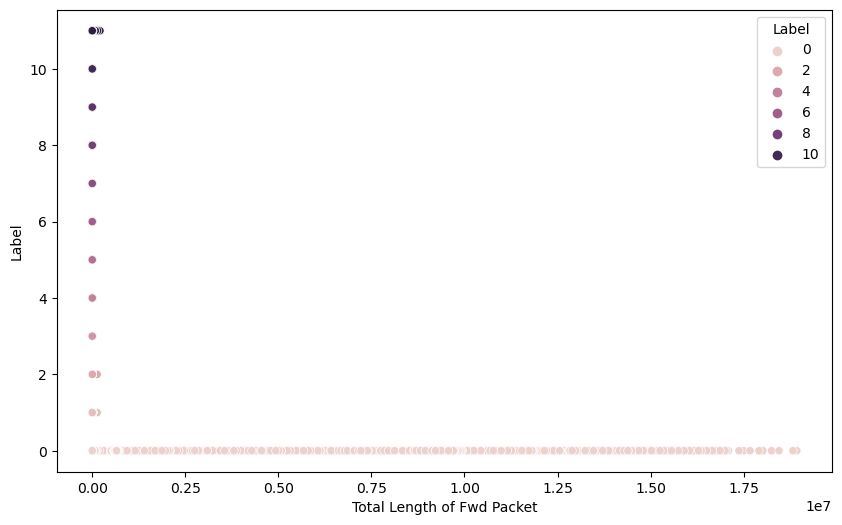

In [31]:
# Feature: Total length of Fwd Packet
# Scatter plot 
scatter_plot(data, x='Total Length of Fwd Packet', y='Label', hue='Label', fig_size=(10, 6), save=True)

> No relation between any labels and Length of Packet 

> **Outliers need to be treated**

> Also, Total Length of bwd packet has similar results, outliers need to be treated

Fig saved successfully!


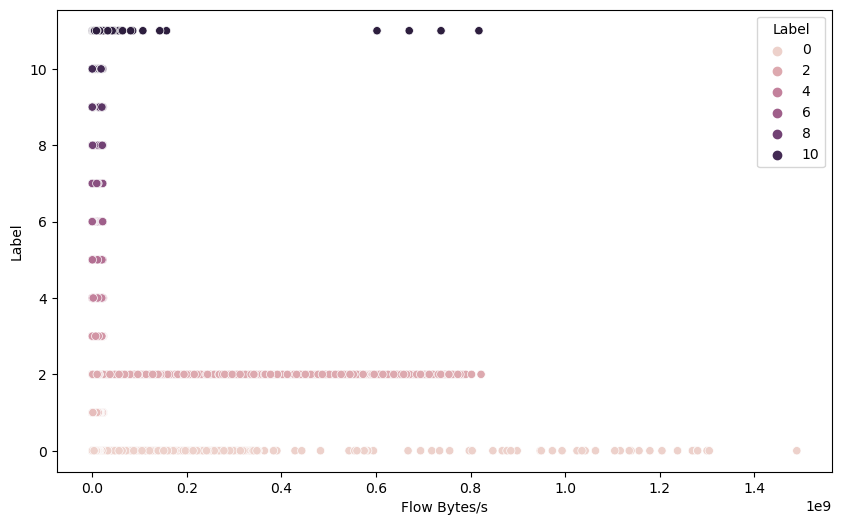

In [38]:
# Feature: Flow Bytes/s 

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Flow Bytes/s', y='Label', hue='Label')

# Save plot
save = True
if save:
    folder_name = 'outlier_plots'
    file_name = f'Flow_bytes_scatter_plot.png'   
    save_plot(folder_name, file_name)

plt.show()

> 2nd label shows maximum values of Bytes per second in a flow

> **Outliers need to be removed**

Fig saved successfully!


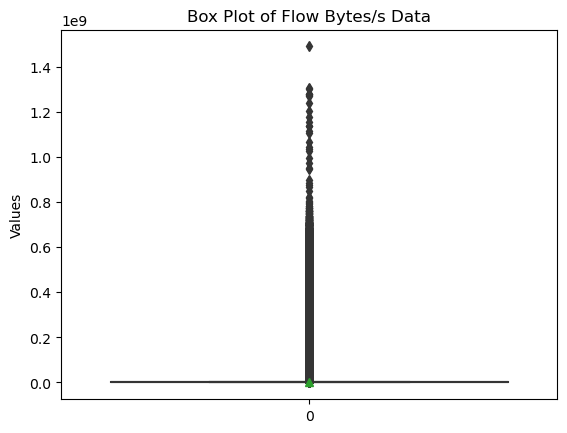

In [39]:
# box plot 
x = 'Flow Bytes/s'
whis = 1.5
sns.boxplot(data[x], palette='viridis', showmeans=True, whis=whis)
plt.title('Box Plot of Flow Bytes/s Data')
plt.ylabel('Values')
plt.grid(False)

# Save plot
save = True
if save:
    folder_name = 'outlier_plots'
    file_name = f'FlowBytes_box_plot.png'   
    save_plot(folder_name, file_name)

plt.show()

Fig saved successfully!


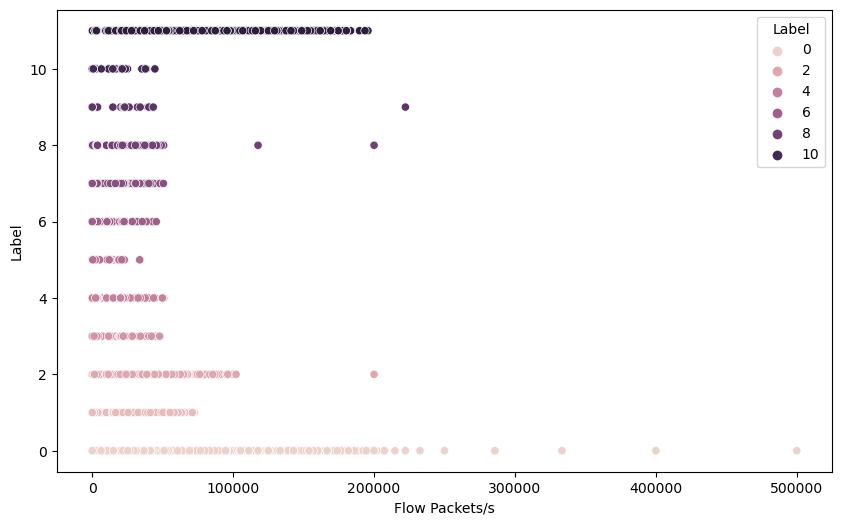

In [42]:
# Feature: Flow Packets/s

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Flow Packets/s', y='Label', hue='Label')

# Save plot
save = True
if save:
    folder_name = 'outlier_plots'
    file_name = f'Flow_packets_scatter_plot.png'   
    save_plot(folder_name, file_name)

plt.show()

In [46]:
# print number of values which are above 75% of the data 
# Calculate the 75th percentile
q3 = np.quantile(data['Flow Packets/s'], 0.75)

# Count the values above the 75th percentile
count_above_q3 = np.sum(data['Flow Packets/s'] > q3)

print("Number of values above the 75th percentile:", count_above_q3)

Number of values above the 75th percentile: 797442


> Significant number of flow packets per seconds which are higher and also shows dependence on label 10

> Label Distribution: The colors representing different labels suggest that some labels may be more frequent or associated with specific ranges of packet rates.

> Common Packet Rates: There seem to be common ranges of packet rates observed in the data, which might correspond to specific network activities or protocols.

> **Some outliers do need to be removed**

Fig saved successfully!


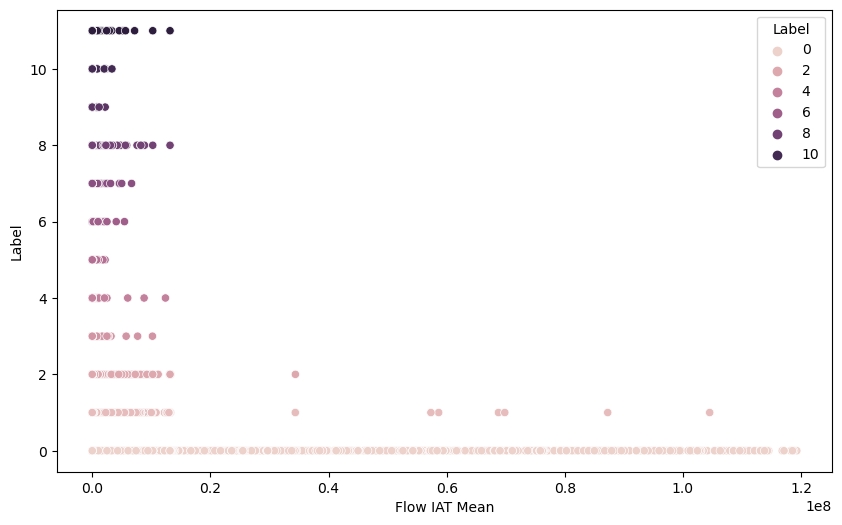

In [51]:
# Feature: Flow IAT Mean 
# Scatter plot
scatter_plot(data, x='Flow IAT Mean', y='Label', hue='Label', fig_size=(10, 6), save=True)

> **Outliers need to be treated**

C:\Users\91790\AppData\Local\Temp\ipykernel_6888\3464609082.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(os.path.join(folder_name, file_name))


Fig saved successfully!


c:\Users\91790\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


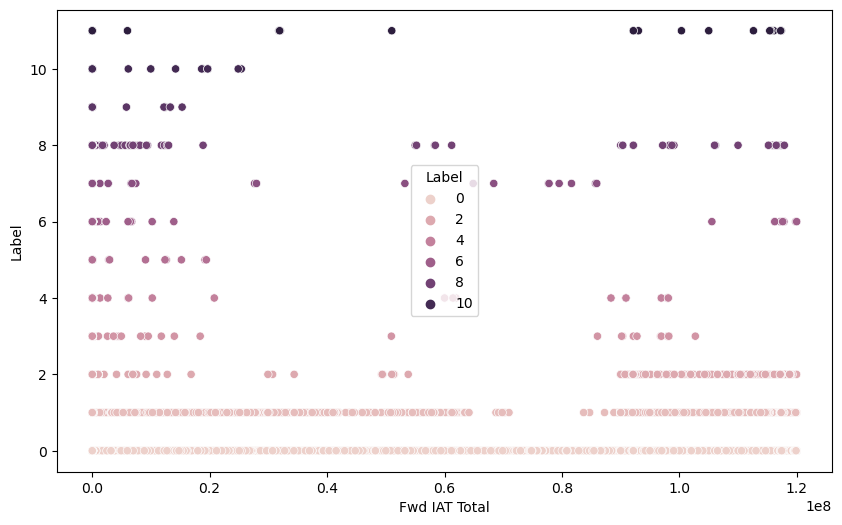

In [56]:
# Feature: Fwd IAT Total
# Scatter plot 
scatter_plot(data, x='Fwd IAT Total', y='Label', hue='Label', fig_size=(10, 6), save=True)

> Concentration of data points near low and high values of total forward inter-arrival time

> **Outlier removal is not needed**

In [60]:
data.columns 

Index(['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Fwd IAT Total',
       'Bwd IAT Total', 'Fwd Header Length', 'Bwd Header Length',
       'Packet Length Mean', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'Label'],
      dtype='object')

Fig saved successfully!


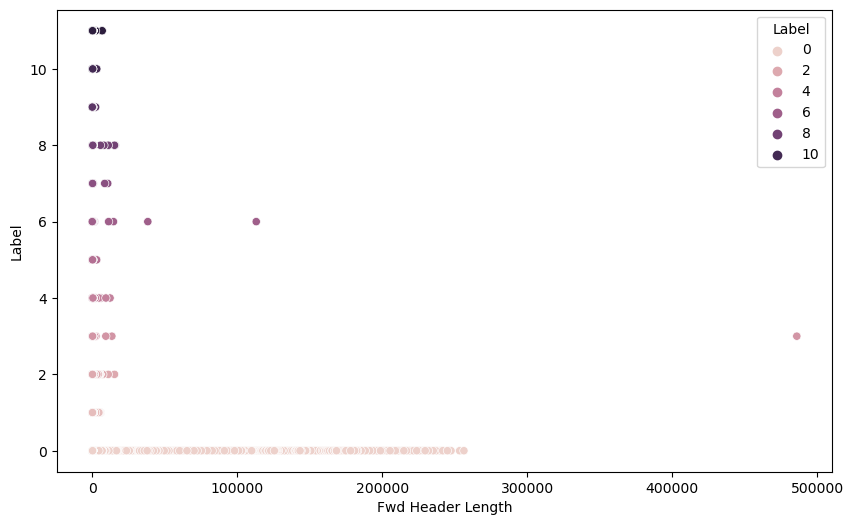

In [62]:
# Feature: Fwd Header Length 
# Scatter plot 
scatter_plot(data, x='Fwd Header Length', y='Label', hue='Label', fig_size=(10, 6), save=True)

> **Outliers need to be treated** for features Fwd Header length and Bwd Header length

Fig saved successfully!


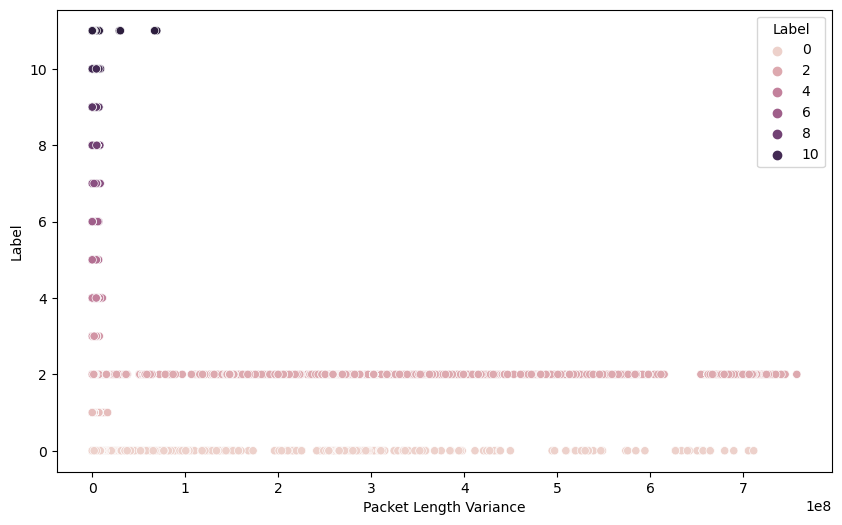

In [69]:
# Feature Packet length mean doesn't have outliers 

# Feature: Packet Length variance 
# Scatter plot
scatter_plot(data, x='Packet Length Variance', y='Label', hue='Label', fig_size=(10, 6), save=True)

> **Outliers need to be treated**

Features showing the flag counts doesn't contain any outliers. 

*Final outcomes*

For these columns, outlier needs to be treated:
- Total Fwd Packet 
- Total Bwd packets 
- Total Length of Fwd Packet 
- Total Length of Bwd Packet
- Flow Bytes/s
- Flow Packets/s
- Flow IAT Mean
- Fwd Header Length 
- Bwd Header Length 
- Packet Length Variance